#Meteostat

In [1]:
!pip install meteostat -q

<img src= "https://www.meteo60.fr/satellites/animation-satellite-ir-france.gif" width="900">

In [2]:
#https://dev.meteostat.net/api/stations/meta.html#response

In [3]:
 # cities coordintes
 #https://www.latlong.net/category/cities-109-15-2.html

https://www.latlong.net/category/cities-109-15-2.html

In [20]:
#cities = {'city_name':[Latitude,Longitude]}
cities = {'Bologna':[44.498955,11.327591]}
cities.values()

list(cities.values())[0][0] #Latitude

44.498955

In [21]:
list(cities.keys())[0]

'Bologna'

In [22]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2019, 1, 1)
end = datetime(2021, 9, 28) # fa una settimana di forecasting

cities = {'Bologna':[44.498955,11.327591]}


# Create Point for Vancouver, BC
city = Point(list(cities.values())[0][0],list(cities.values())[0][1], 20)

# Get daily data for 2018
data = Daily(city, start, end)
data = data.fetch()
data['city'] = list(cities.keys())[0]

data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2019-01-01,0.6,-2.9,4.1,NaN,NaN,266.0,7.9,NaN,1027.1,NaN,Bologna
2019-01-02,0.2,-2.0,2.1,NaN,NaN,269.0,7.4,NaN,1020.2,NaN,Bologna
2019-01-03,0.8,-2.9,6.1,NaN,NaN,205.0,7.5,NaN,1026.5,NaN,Bologna
2019-01-04,0.3,-4.9,6.1,NaN,NaN,234.0,7.0,NaN,1028.7,NaN,Bologna
2019-01-05,0.2,-2.9,4.4,NaN,NaN,233.0,5.9,NaN,1021.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,19.8,13.7,27.3,0.0,NaN,148.0,9.4,NaN,1018.3,NaN,Bologna
2021-09-25,20.7,14.4,27.2,0.0,NaN,156.0,7.0,NaN,1020.4,NaN,Bologna
2021-09-26,19.3,16.2,24.1,3.6,NaN,178.0,7.7,NaN,1019.4,NaN,Bologna


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1002 entries, 2019-01-01 to 2021-09-28
Freq: D
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    999 non-null    float64
 1   tmin    999 non-null    float64
 2   tmax    999 non-null    float64
 3   prcp    269 non-null    float64
 4   snow    0 non-null      float64
 5   wdir    999 non-null    float64
 6   wspd    999 non-null    float64
 7   wpgt    0 non-null      float64
 8   pres    999 non-null    float64
 9   tsun    0 non-null      float64
 10  city    1002 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.9+ KB


In [24]:
#Iteration Pandas

for city in cities.items():
    print(city)

('Bologna', [44.498955, 11.327591])


In [25]:
for key, value in cities.items():
    print(key, '->', value)
    print(value[0])

Bologna -> [44.498955, 11.327591]
44.498955


## Multiples

In [26]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

# Set time period
start = datetime(2019, 1, 1)
end = datetime(2021, 9, 28)

cities = {'Bologna':[44.498955,11.327591],
          'Ravenna':[44.418362,12.203529]
          }

###############################################################

data = pd.DataFrame()

for key, value in cities.items():
    print(key, '->', value)
    city = Point(value[0],#lat 
             value[1],#long
             20 # m height
             )
    # Get daily data for 2018
    data1 =Daily(city, start, end)
    data1 = data1.fetch()
    data1['city'] = key
    data=data.append(data1,ignore_index=False)
    

data.to_csv('test.csv')
print('Done!')
data

Bologna -> [44.498955, 11.327591]
Ravenna -> [44.418362, 12.203529]
Done!


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2019-01-01,0.6,-2.9,4.1,NaN,NaN,266.0,7.9,NaN,1027.1,NaN,Bologna
2019-01-02,0.2,-2.0,2.1,NaN,NaN,269.0,7.4,NaN,1020.2,NaN,Bologna
2019-01-03,0.8,-2.9,6.1,NaN,NaN,205.0,7.5,NaN,1026.5,NaN,Bologna
2019-01-04,0.3,-4.9,6.1,NaN,NaN,234.0,7.0,NaN,1028.7,NaN,Bologna
2019-01-05,0.2,-2.9,4.4,NaN,NaN,233.0,5.9,NaN,1021.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,18.9,11.9,25.9,0.0,NaN,170.0,6.0,NaN,1018.6,NaN,Ravenna
2021-09-25,21.0,14.9,27.1,0.0,NaN,132.0,5.6,NaN,1020.1,NaN,Ravenna
2021-09-26,21.1,17.9,26.9,2.7,NaN,66.0,6.8,NaN,1019.5,NaN,Ravenna


In [27]:
data.groupby('city').count()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
city,,,,,,,,,,
Bologna,999,999,999,269,0,999,999,0,999,0
Ravenna,1002,1002,1002,934,2,999,999,0,999,0


In [28]:
df = data[data['city']=='Bologna']

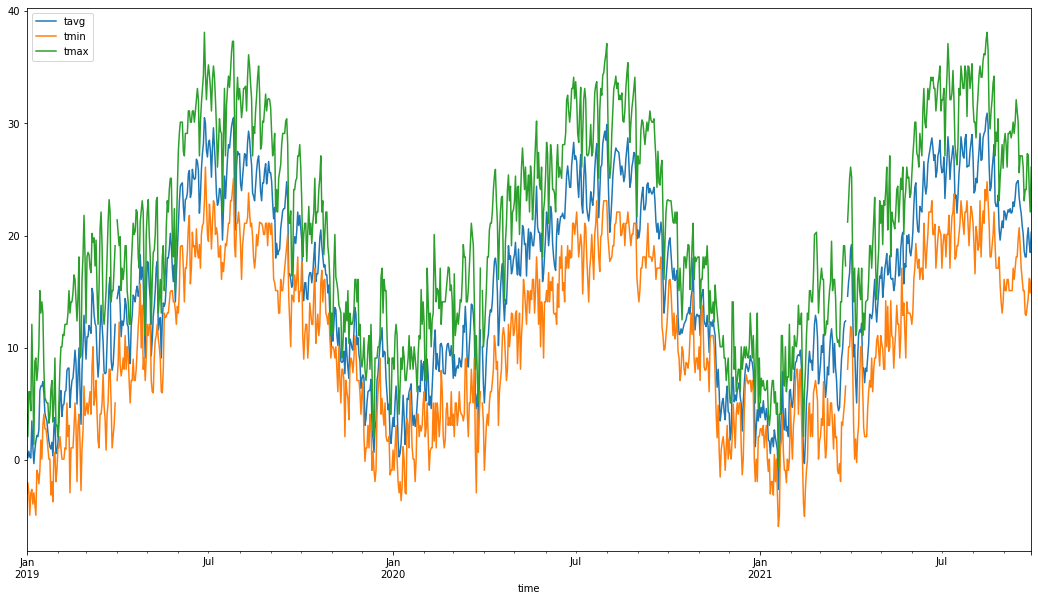

In [29]:
# Plot line chart including average, minimum and maximum temperature
df.plot(y=['tavg', 'tmin', 'tmax'],figsize=(18,10))
plt.show()

In [30]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2019-01-01,0.6,-2.9,4.1,NaN,NaN,266.0,7.9,NaN,1027.1,NaN,Bologna
2019-01-02,0.2,-2.0,2.1,NaN,NaN,269.0,7.4,NaN,1020.2,NaN,Bologna
2019-01-03,0.8,-2.9,6.1,NaN,NaN,205.0,7.5,NaN,1026.5,NaN,Bologna
2019-01-04,0.3,-4.9,6.1,NaN,NaN,234.0,7.0,NaN,1028.7,NaN,Bologna
2019-01-05,0.2,-2.9,4.4,NaN,NaN,233.0,5.9,NaN,1021.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,19.8,13.7,27.3,0.0,NaN,148.0,9.4,NaN,1018.3,NaN,Bologna
2021-09-25,20.7,14.4,27.2,0.0,NaN,156.0,7.0,NaN,1020.4,NaN,Bologna
2021-09-26,19.3,16.2,24.1,3.6,NaN,178.0,7.7,NaN,1019.4,NaN,Bologna


In [32]:
### ZOOM 

import plotly.graph_objects as go

fig = go.Figure()

#Actual 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tavg'],
                         mode = "lines",
                         name = "Actual",
                         line_color='#0000FF',
                         ))

#Predicted 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tmax'],
                         mode = "lines", 
                         name = "Predicted",
                         line_color='#ff8c00',
                         ))

# adjust layout
fig.update_layout(title = "Titolo",
                  xaxis_title = "Date",
                  yaxis_title = "Sales",
                  width = 950,
                  height = 700,
                  )

# zoomming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

## Featurizing

In [13]:
# if we have time as a string column -->
# df['Mese'] = pd.to_datetime(df['Data']).dt.month 
# df['Anno'] = pd.to_datetime(df['Data']).dt.year


In [14]:
import pandas as pd

url = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/monthly_csv.csv"
df = pd.read_csv( url,
                 index_col="Date",
                 parse_dates=['Date'],
                 ) 
df.head()

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292


In [15]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df

,Source,Mean,year,month
Date,,,,
2016-12-06,GCAG,0.7895,2016,12
2016-12-06,GISTEMP,0.8100,2016,12
2016-11-06,GCAG,0.7504,2016,11
2016-11-06,GISTEMP,0.9300,2016,11
2016-10-06,GCAG,0.7292,2016,10
...,...,...,...,...
1880-03-06,GISTEMP,-0.1800,1880,3
1880-02-06,GCAG,-0.1229,1880,2
1880-02-06,GISTEMP,-0.2100,1880,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2016-12-06 to 1880-01-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Mean    3288 non-null   float64
 2   year    3288 non-null   int64  
 3   month   3288 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 128.4+ KB


In [17]:
import altair as alt 

alt.Chart(df).mark_rect().encode( 
    x= 'year:O' , 
    y= 'month:O' , 
    color=alt.Color( 'Mean:Q' , scale=alt.Scale( range =['blue','green', 'yellow','orange','red'])) 
).properties(width= 1600,height=550)

alt.Chart(...)

In [18]:
alt.Chart(df).mark_boxplot().encode(
    x='month',
    y='Mean'
).properties(width= 1000,height=550)

alt.Chart(...)

In [19]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]

charts =alt.hconcat(spacing=0)
for i in range(1,13):
    if i == 1:
        axis = alt.Axis(grid=False)
    else:
        axis = None
    chart = alt.Chart(df).mark_line().encode(
        x=alt.X('year:O', title=months[i-1]),
        y=alt.Y('Mean', axis=axis)
    ).transform_filter(
        alt.FieldEqualPredicate(field='month', equal=i)
    ).properties(
        width=300,
        height=550
    )
    charts |= chart

charts

alt.HConcatChart(...)